- 단순 선형 회귀분석 : 변수가 1개인 경우
  - $\hat{Y}=\hat{\beta}_0+\hat{\beta}_1X$
- 다중 선형 회귀분석 : 변수가 여러개인 경우
  - $\hat{Y}=\hat{\beta}_0+\hat{\beta}_1X_1+\hat{\beta}_1X_2+...+\hat{\beta}_pX_p$

- 단순 선형 회귀계수 추정
  - 회귀계수를 추정하는 것은 단순선형회귀분석과 동일하게 SSE를 최소화 하는 방향으로 추정함

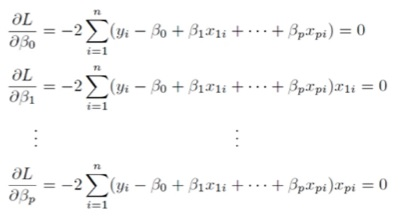

- 다중 선형 회귀계수 추정(프로그램은 행렬로 추정)

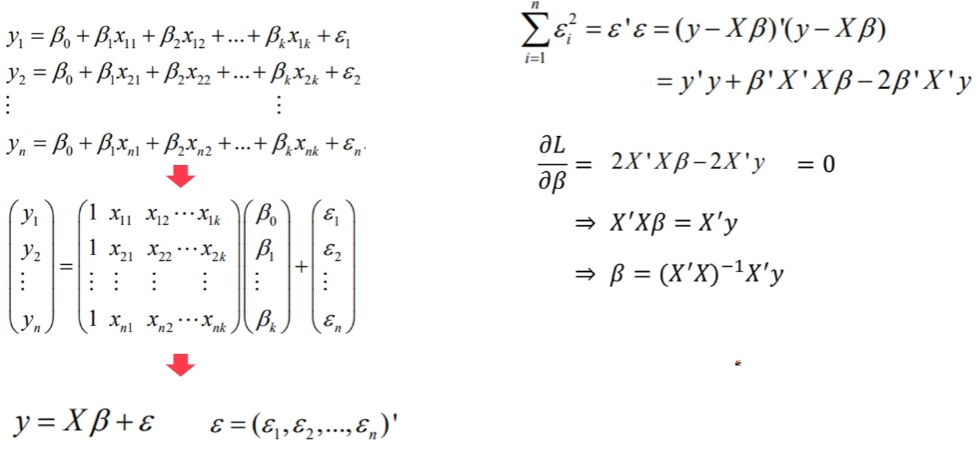

### 다중 선형 회귀계수 해석
- 광고미디어 예에 다중선형회귀를 적용하면 아래와 같다
- 신문 광고의 경우 단순선형회귀에서는 출력 변수인 매출과 연관이 있었지만, 다중선형회귀에는 p-value가 0.86으로 높아 매출에 유의미한 영향을 미치지 못함
- **신문 광고의 단순선형회귀에서 TV 광고와 라디오 광고의 영향력을 무시하였기 때문**

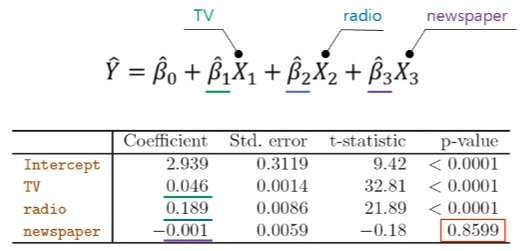

- 다중 선형 회귀 계수 검정
  - 기본적으로 단순회귀와 동일하다.
  - 귀무가설: $B_p=0$(회귀계수는 0이다. 즉 변수의 설명력이 없다.)
  - 대립가설: $B_1p\neq0$(회귀계수는 0이 아니다. 즉 변수의 설명력이 존재한다.)

- **다중 선형 회귀 모델 검정(단순에서 하나가 추가)
  - 귀무가설: $B_1=B_2...B_p=0$(모든 회귀계수는 0이다, 즉 변수의 설명력이 하나도 존재하지 않는다.)
    - 변수가 많아질수록 귀무가설을 기각할 확률이 높아진다.
  - 대립가설: 하나의 회귀계수라도 0이 아니다(즉, 설명력이 있는 변수가 존재한다.)
  - F검정을 통해서 검정 : $F=\frac{V_1/k_1}{V_2/k_2}\sim F(k_1,k_2)$
    - 두 확률 변수 V1,V2가 서로 독립인 카이제곱 분포를 따른다고 할 때 확률변수 F는 F분포를 따른다고 함. F검정과 분산분석 등에서 주로 사용됨

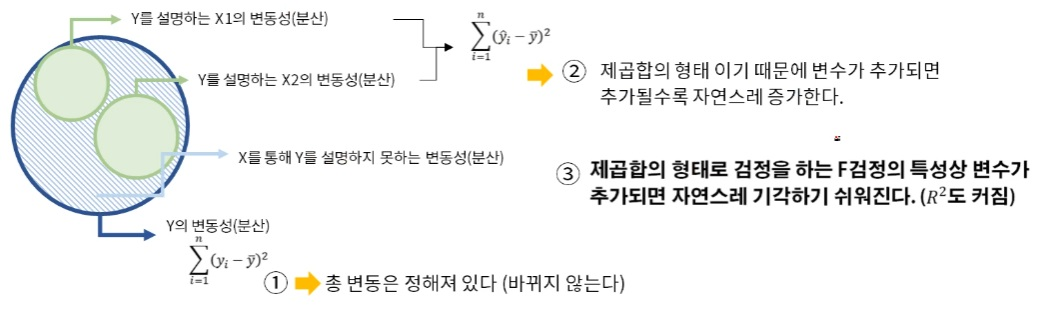

- 변수가 많아지면 다중공선성이 발생.
  - $R^2, F$검정도 커지게 되는 현상이 발생하게 된다.

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
#현재 경로 확인
os.getcwd()

'C:\\Users\\mitha\\OneDrive\\바탕 화면\\dev\\My_First_ML\\Regression_Analysis'

In [3]:
boston=pd.read_csv("C:/Users/mitha/OneDrive/바탕 화면/Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [4]:
#target 제외한 데이터만 뽑기
boston_data=boston.drop(['Target'],axis=1)

In [5]:
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [6]:
#변수 설정 target/crim/rm/lsstat
target=boston[['Target']]
crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston[['LSTAT']]

In [9]:
#crim 변수에 상수항추가
crim1=sm.add_constant(crim,has_constant='add')
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [10]:
#sm.OLS 적합시키기
model1=sm.OLS(target,crim1)
fitted_model1=model1.fit()

In [11]:
#summary 함수 출력
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.17e-19
Time:                        11:28:58   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [15]:
#predict 함수를 통해 yhat 구하기
pred1=fitted_model1.predict(crim1)

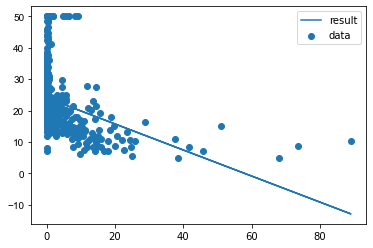

In [16]:
import matplotlib.pyplot as plt
plt.yticks(fontname='Arial')
plt.scatter(crim,target,label='data')
plt.plot(crim,pred1,label='result')
plt.legend()#result, data 범례(미니박스) 표시
plt.show()

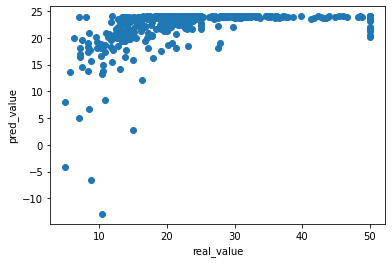

In [17]:
plt.scatter(target,pred1)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

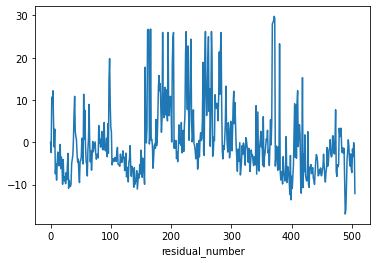

In [18]:
#residual 시각화
fitted_model1.resid.plot()
plt.xlabel('residual_number')
plt.show()
#균일하게 보기는 좀 어렵다

In [19]:
#상수항 추가
rm1=sm.add_constant(rm,has_constant='add')
lstat1=sm.add_constant(lstat,has_constant='add')

In [20]:
#회귀모델 적합
model2=sm.OLS(target,rm1)
fitted_model2=model2.fit()
model3=sm.OLS(target,lstat1)
fitted_model3=model3.fit()

In [21]:
#모델 결과 출력
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        11:30:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        11:30:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#predict 함수를 통해 yhat 구하기
pred2=fitted_model2.predict(rm1)
pred3=fitted_model3.predict(lstat1)

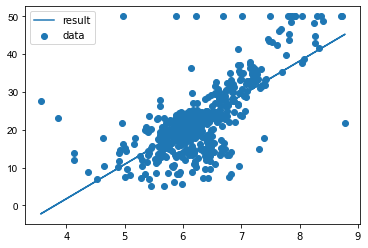

In [24]:
#시각화
plt.yticks(fontname='Arial')
plt.scatter(rm,target,label='data')
plt.plot(rm,pred2,label='result')
plt.legend()#result, data 범례(미니박스) 표시
plt.show()

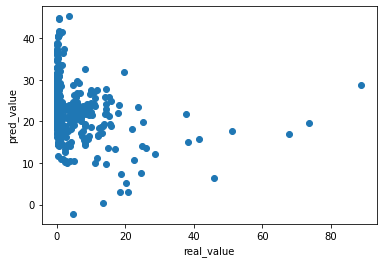

In [25]:
plt.scatter(crim,pred2)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

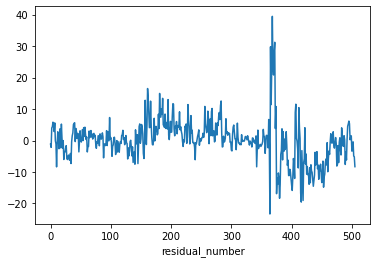

In [26]:
#residual 시각화
fitted_model2.resid.plot()
plt.xlabel('residual_number')
plt.show()

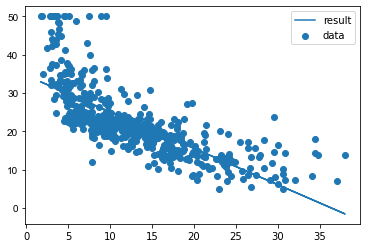

In [27]:
plt.yticks(fontname='Arial')
plt.scatter(lstat,target,label='data')
plt.plot(lstat,pred3,label='result')
plt.legend()#result, data 범례(미니박스) 표시
plt.show()

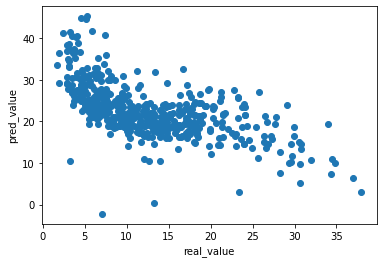

In [28]:
plt.scatter(lstat,pred2)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

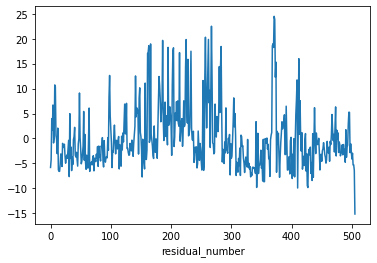

In [29]:
#잔차가 0 주변으로 몰려있는 것이 좋음
fitted_model3.resid.plot()
plt.xlabel('residual_number')
plt.show()

## 다중선형회귀분석
### crim,rm,lstat 세개의 변수를 통해 다중회귀적합

In [31]:
# boston data에서 crim,rm, lstat 변수만 뽑아오기
x_data=boston[['CRIM','RM','LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [35]:
#상수항 추가
x_data1=sm.add_constant(x_data,has_constant='add')

In [36]:
#회귀모델 적합
multi_model=sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [37]:
#결과출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 20 Jun 2021   Prob (F-statistic):          1.01e-112
Time:                        11:34:03   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 단순선형회귀모델의 회귀계수와 비교

In [40]:
#단순선형회귀모델의 계수
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [41]:
#다중선형회귀모델의 회귀 계수
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


- R squared : 1~3번째 변수들의 R squared 값을 비교했을 때 지금의 값이 더 높다.
- 변수가 여러개일 때, x의 변동성의 중복을 각각 가져갈수가 없다.
- 지금같은 경우에는 셋의 p-value가 모두 낮고, 단순 회귀분석의 lstat의 R squared보다 높음 
  - 다중공선성이 있지만 이 변수를 쓰는 것도 나쁘지는 않음

### 행렬연산을 통해 beta 구하기

In [46]:
from numpy import linalg #행렬 연산을 통해 beat 구하기 (X'X)-1X'y
ba=linalg.inv(np.dot(x_data1.T,x_data1))#역행렬 구하기
np.dot(np.dot(ba,x_data1.T),target)
#위의 beta값과 동일한 것을 알 수 있다.

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [48]:
#y.hat 구하기
pred4=fitted_multi_model.predict(x_data1)

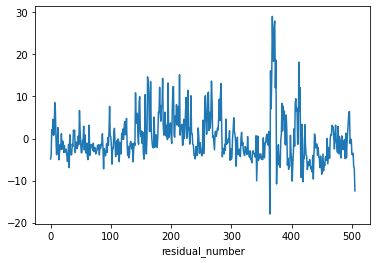

In [49]:
ㄹ=fitted_multi_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

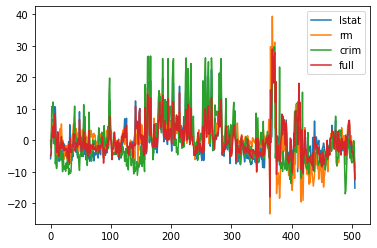

In [51]:
fitted_model3.resid.plot(label='lstat')
fitted_model2.resid.plot(label='rm')
fitted_model1.resid.plot(label='crim')
fitted_multi_model.resid.plot(label='full')
plt.legend()

- 빨간 residual 그래프가 0에 그나마 제일 가까운 것을 확인할 수 있다.